# Behavior Analysis: % Total Frames Per Behavior

Press SHIFT + ENTER to run code

### USER INPUT!

In [2]:
## Define project
project_name = ''

# Select group and condition, see meta.py to see how you previously defined it for your project
selected_groups = ['', '']
selected_conditions = ['', '']

### Main Code: Create Pie Graph of Total Frames Per Behavior

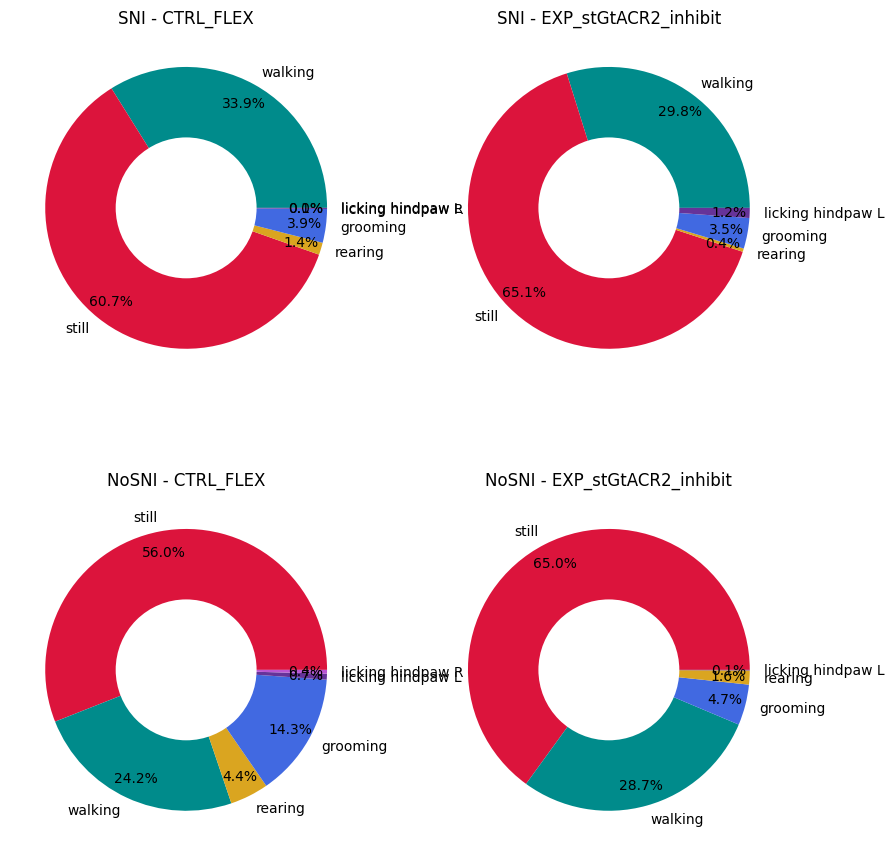

In [7]:
###### RUN DEPENDENCIES ######
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *

###### Load Behaviors ######
behaviors = load_behaviors(f"../processed_dataset/{project_name}/behaviors_{project_name}.pkl")

# Define the directory path for saving figures
directory_path = f"../processed_dataset/{project_name}/figures/behavior_total-frames"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    
# Define grid dimensions based on selected_groups and selected_conditions
total_rows = len(selected_groups)
total_cols = len(selected_conditions)
count = 0

# Create subplots
fig, ax = plt.subplots(total_rows, total_cols, figsize=(10, 11))

# Reshape the axes array to 2D for consistent indexing
if total_rows == 1 and total_cols == 1:
    ax = np.array([[ax]])
elif total_rows == 1:
    ax = np.expand_dims(ax, axis=0)
elif total_cols == 1:
    ax = ax.reshape(-1, 1)

# Loop over each row (group)
for row in range(total_rows):
    # Determine how many columns to display for this row:
    # For rows > 4, use only one column. Otherwise, use all defined conditions.
    n_plot_cols = total_cols if row <= 4 else 1
    
    # Delete extra axes in the current row if n_plot_cols is less than total_cols
    if n_plot_cols < total_cols:
        for extra_col in range(n_plot_cols, total_cols):
            fig.delaxes(ax[row, extra_col])
    
    # Loop over each column for the current row
    for col in range(n_plot_cols):
        selected_group = selected_groups[row]
        # If only one column is available, use the first condition; otherwise, use the condition based on the current col.
        selected_condition = selected_conditions[col] if n_plot_cols > 1 else selected_conditions[0]

        if selected_group in behaviors and selected_condition in behaviors[selected_group]:
            file_keys = list(behaviors[selected_group][selected_condition].keys())
            
            predict_dict = {
                'condition': np.repeat(
                    selected_condition,
                    len(np.hstack([
                        behaviors[selected_group][selected_condition][file_name]
                        for file_name in file_keys
                    ]))
                ),
                'behavior': np.hstack([
                    behaviors[selected_group][selected_condition][file_name]
                    for file_name in file_keys
                ])
            }
            df_raw = pd.DataFrame(data=predict_dict)
            labels = df_raw['behavior'].value_counts(sort=False).index
            values = df_raw['behavior'].value_counts(sort=False).values
            
            # Create a summary DataFrame
            df = pd.DataFrame()
            behavior_labels = []
            for l in labels:
                behavior_labels.append(behavior_names[int(l)])
            df["values"] = values
            df['labels'] = behavior_labels
            df["colors"] = df["labels"].apply(
                lambda x: behavior_colors[behavior_names.index(x)]
            )
            df.to_csv(
                f"../processed_dataset/{project_name}/figures/behavior_total-frames/behavior_total_frames_{project_name}_{selected_group}-{selected_condition}.csv", 
                index=False
            )

            # Create the pie chart
            ax[row, col].pie(
                df['values'],
                colors=df['colors'], 
                labels=df['labels'],
                autopct='%1.1f%%', 
                pctdistance=0.85
            )
            # Draw the center circle
            centre_circle = plt.Circle((0, 0), 0.50, fc='white')
            ax[row, col].add_artist(centre_circle)
            ax[row, col].set_title(f'{selected_group} - {selected_condition}')
            count += 1

fig.savefig(
    f"../processed_dataset/{project_name}/figures/behavior_total-frames/behavior_total-frames_{project_name}.svg", 
    dpi=600, bbox_inches='tight'
)
        
plt.show()

# ANALYSIS COMPLETE!